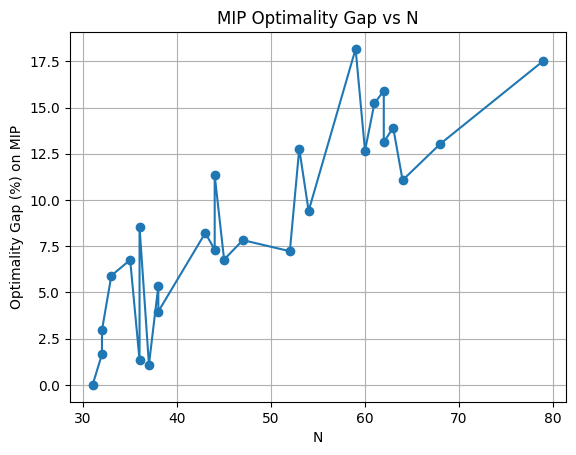

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
dir = "../../results/"
# importo il file in numnpy
data = pd.read_csv(dir + "mip-results.csv")


data_np = data.to_numpy()

# faccio il grafico di N vs gap
N = data["N"]
gap = data["Optimality_Gap(%)"]
plt.plot(N, gap, marker='o')
plt.xlabel('N')
plt.ylabel('Optimality Gap (%) on MIP')
plt.title('MIP Optimality Gap vs N')
plt.grid()
plt.show()

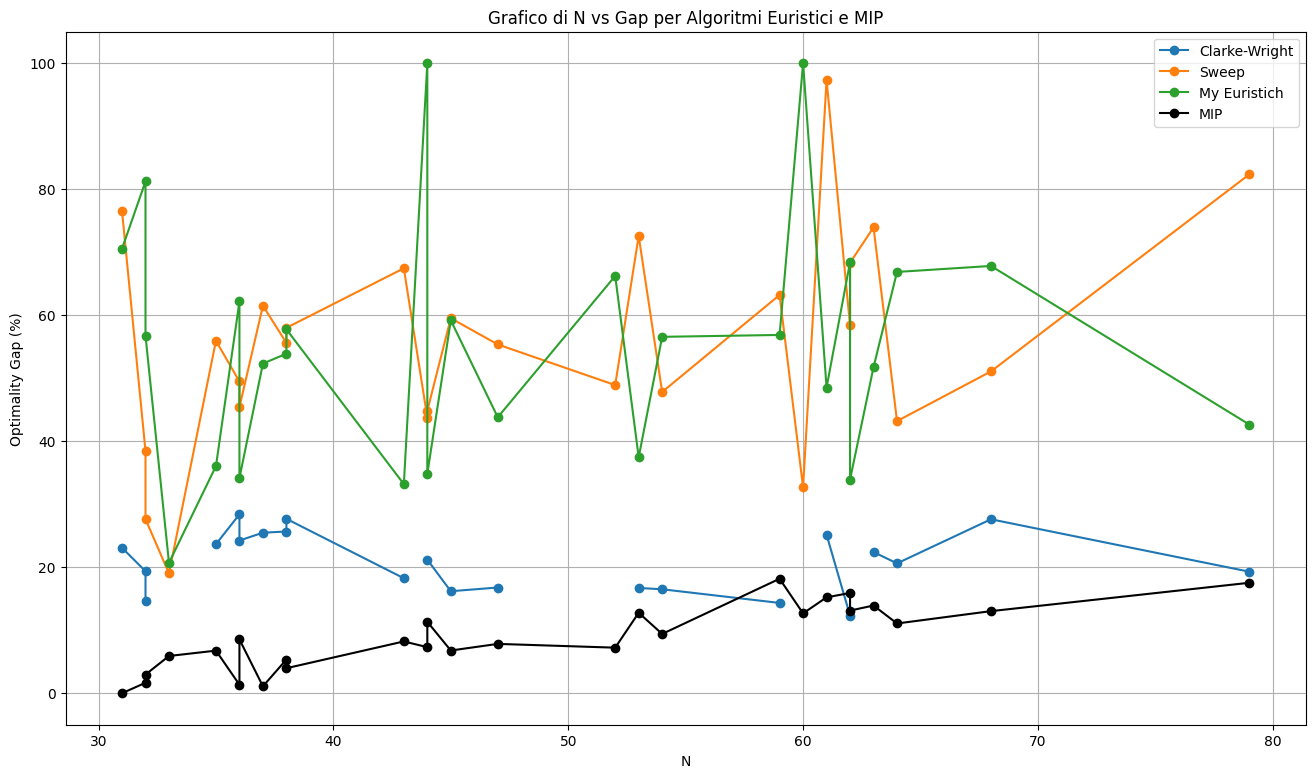

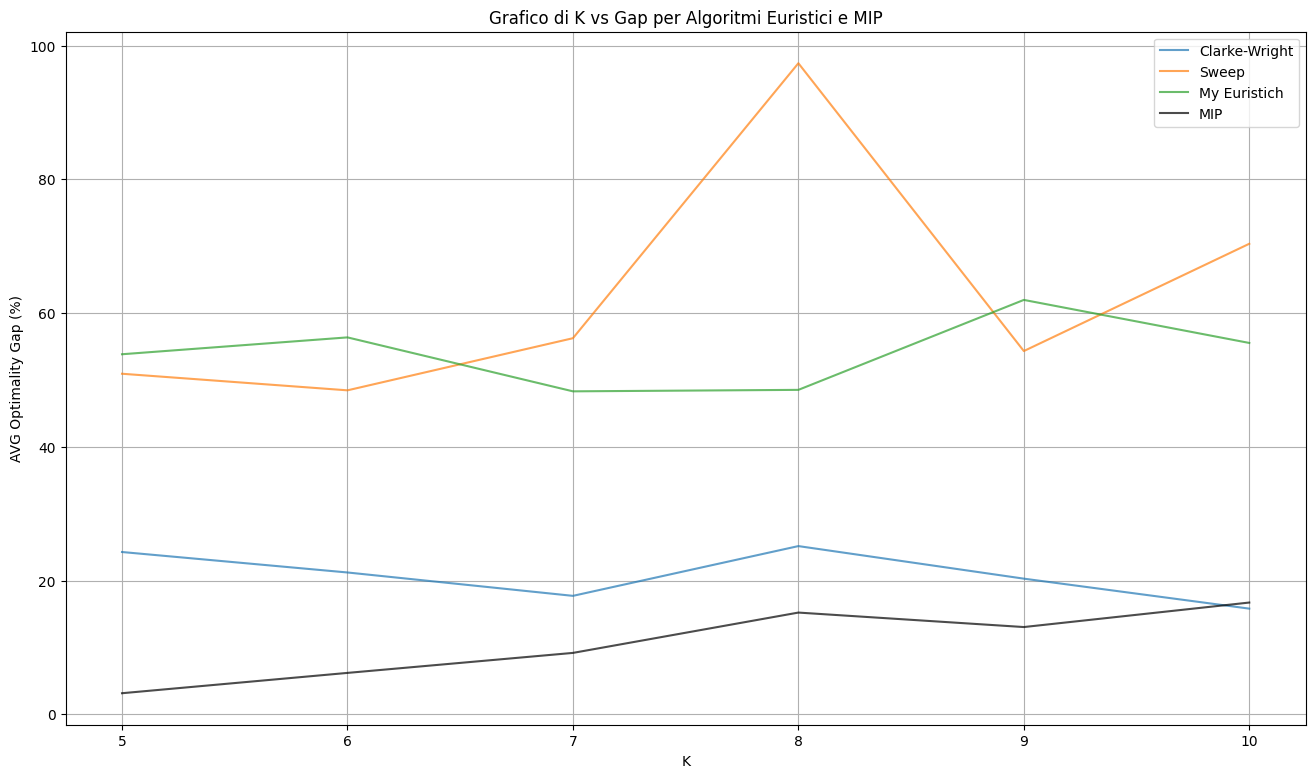

/tmp/ipykernel_78764/141723226.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([gap_clarke, gap_sweep, gap_my_euristich, gap_mip], labels=['Clarke-Wright', 'Sweep', 'My Euristich', 'MIP'])


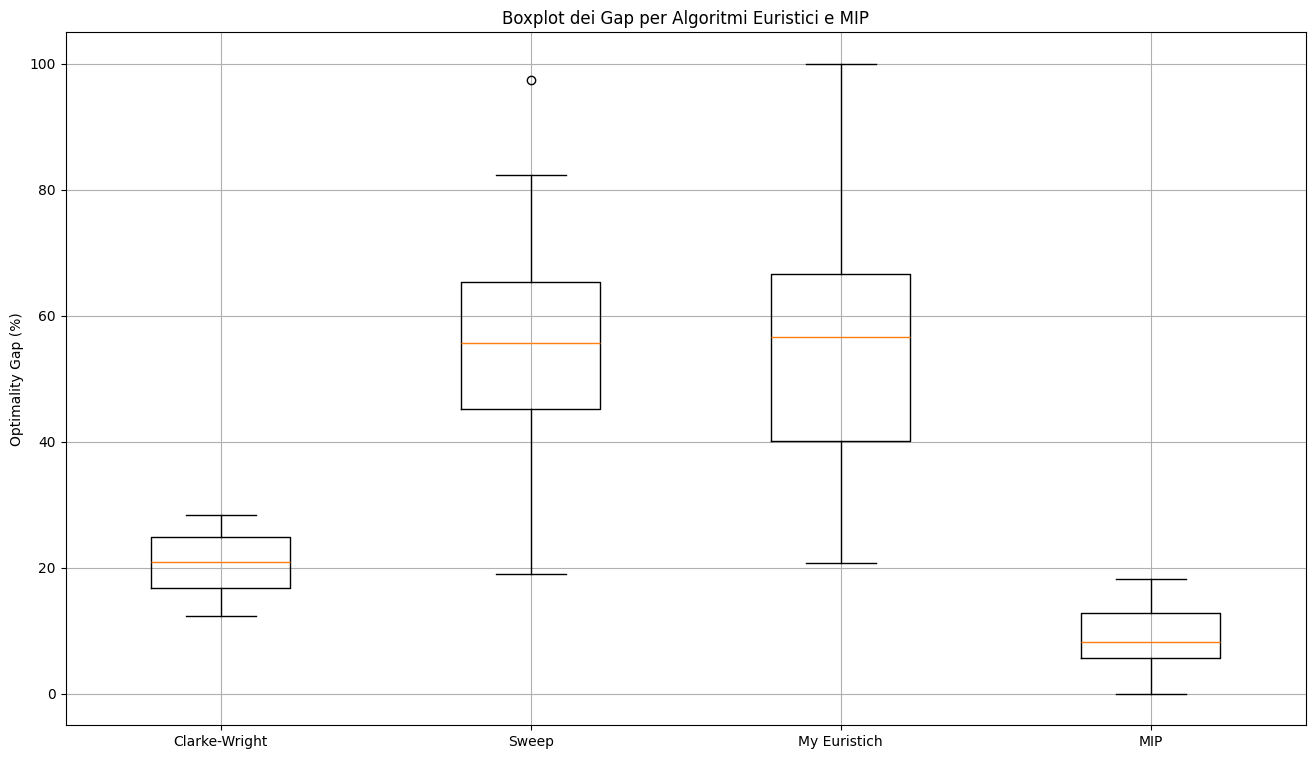

In [ ]:
# Grafico di qualità della soluzione negli algoritmi euristici

data_clarke = pd.read_csv(dir + "clarke-results.csv")
data_sweep = pd.read_csv(dir + "sweep-results.csv")
data_my_euristich = pd.read_csv(dir + "my-euristich-results.csv")
data_mip = pd.read_csv(dir +"mip-results.csv")

# tolto i nan
#data_clarke = data_clarke.dropna()
#data_sweep = data_sweep.dropna()
#data_my_euristich = data_my_euristich.dropna()

N = data_clarke["N"]
K = data_clarke["K"]
gap_clarke = data_clarke["Optimality_Gap(%)"]
gap_sweep = data_sweep["Optimality_Gap(%)"]
gap_my_euristich = data_my_euristich["Optimality_Gap(%)"]
gap_mip = data["Optimality_Gap(%)"]
plt.figure(figsize=(16, 9))
plt.plot(N, gap_clarke, marker='o', linestyle='-', label='Clarke-Wright')
plt.plot(N, gap_sweep, marker='o', linestyle='-', label='Sweep')
plt.plot(N, gap_my_euristich, marker='o', linestyle='-', label='My Euristich')
plt.plot(N, gap_mip, marker='o', linestyle='-', label='MIP', color='black')
plt.xlabel('N')
plt.ylabel('Optimality Gap (%)')
plt.title('Grafico di N vs Gap per Algoritmi Euristici e MIP')
plt.legend()
plt.grid()
plt.show()

#Grafico con K usando le medie dei gap per ogni K
gap_clarke_K = data_clarke.groupby("K")["Optimality_Gap(%)"].mean() 
gap_sweep_K = data_sweep.groupby("K")["Optimality_Gap(%)"].mean()
gap_my_euristich_K = data_my_euristich.groupby("K")["Optimality_Gap(%)"].mean()
gap_mip_K = data_mip.groupby("K")["Optimality_Gap(%)"].mean()
K = gap_clarke_K.index

plt.figure(figsize=(16, 9))
plt.plot(K, gap_clarke_K, label='Clarke-Wright', alpha=0.7)
plt.plot(K, gap_sweep_K, label='Sweep', alpha=0.7)
plt.plot(K, gap_my_euristich_K, label='My Euristich', alpha=0.7)
plt.plot(K, gap_mip_K, label='MIP', alpha=0.7, color='black')
plt.xlabel('K')
plt.ylabel('AVG Optimality Gap (%)')
plt.title('Grafico di K vs Gap per Algoritmi Euristici e MIP')
plt.legend()
plt.grid()
plt.show()
# Faccio il grafico a candela con gli stessi dati
gap_clarke = gap_clarke.dropna()
plt.figure(figsize=(16, 9))
plt.boxplot([gap_clarke, gap_sweep, gap_my_euristich, gap_mip], labels=['Clarke-Wright', 'Sweep', 'My Euristich', 'MIP'])
plt.ylabel('Optimality Gap (%)')
plt.title('Boxplot dei Gap per Algoritmi Euristici e MIP')
plt.grid()
plt.show()



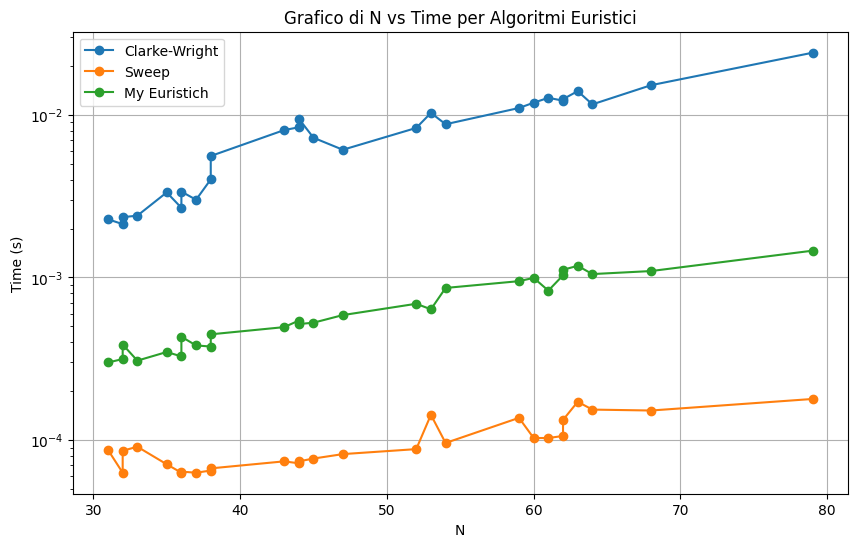

In [4]:
# Grafico di tempo di esecuzione negli algoritmi euristici

plt.figure(figsize=(10, 6))
time_clarke = data_clarke["Processing_Time(s)"]
time_sweep = data_sweep["Processing_Time(s)"]
time_my_euristich = data_my_euristich["Processing_Time(s)"]
time_mip = data["Processing_Time(s)"]
plt.plot(N, time_clarke, marker='o', linestyle='-', label='Clarke-Wright')
plt.plot(N, time_sweep, marker='o', linestyle='-', label='Sweep')
plt.plot(N, time_my_euristich, marker='o', linestyle='-', label='My Euristich')
#plt.plot(N, time_mip, marker='o', linestyle='-', label='MIP', color='black')
plt.xlabel('N')
plt.ylabel('Time (s)')
plt.title('Grafico di N vs Time per Algoritmi Euristici')
plt.legend()
plt.grid()
plt.yscale('log')  # scala logaritmica per il tempo
plt.show()




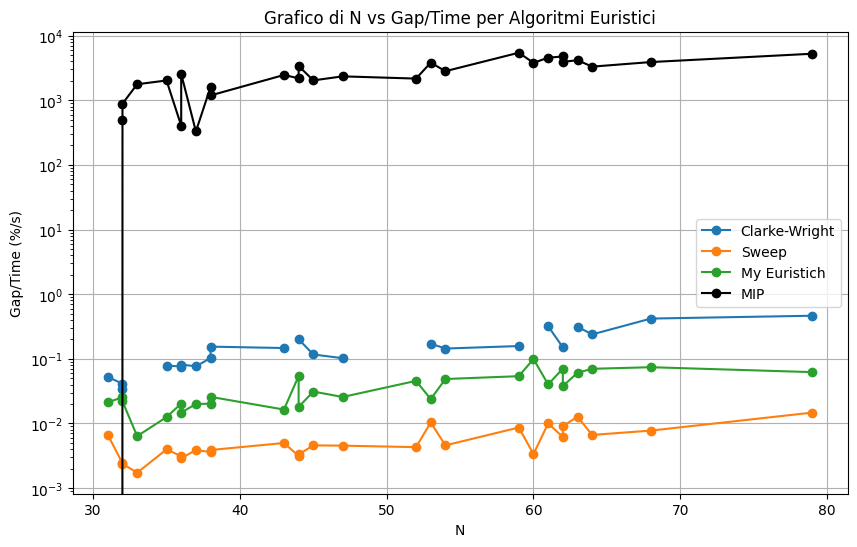

In [17]:
# Grafico di gap/time al variare di N

plt.figure(figsize=(10, 6))
plt.plot(N, gap_clarke * time_clarke, marker='o', linestyle='-', label='Clarke-Wright')
plt.plot(N, gap_sweep * time_sweep, marker='o', linestyle='-', label='Sweep')
plt.plot(N, gap_my_euristich * time_my_euristich, marker='o', linestyle='-', label='My Euristich')
plt.plot(N, gap_mip * time_mip, marker='o', linestyle='-', label='MIP', color='black')
plt.xlabel('N')
plt.ylabel('Gap/Time (%/s)')
plt.yscale('log')  # scala logaritmica per il gap/time
plt.title('Grafico di N vs Gap/Time per Algoritmi Euristici')
plt.legend()
plt.grid()
plt.show()

   Characteristic  Optimality_Gap(%)  Optimality_K_Gap(%)  Processing_Time(s)
0    Depot random          31.899850             2.944062            0.042920
1  Depot centered          34.573200             3.594259            0.036672
2  Depot cornered          27.480366             2.570809            0.043904
               Characteristic  Optimality_Gap(%)  Optimality_K_Gap(%)  \
0            Customers random          34.539315             2.959286   
1         Customers clustered          27.016126             3.117408   
2  Customers random-clustered          32.429617             3.037544   

   Processing_Time(s)  
0            0.040582  
1            0.041920  
2            0.041006  
                                  Characteristic  Optimality_Gap(%)  \
0                                 Demand unitary          30.166774   
1              Demand small values with large CV          31.256436   
2              Demand small values with small CV          31.888424   
3              

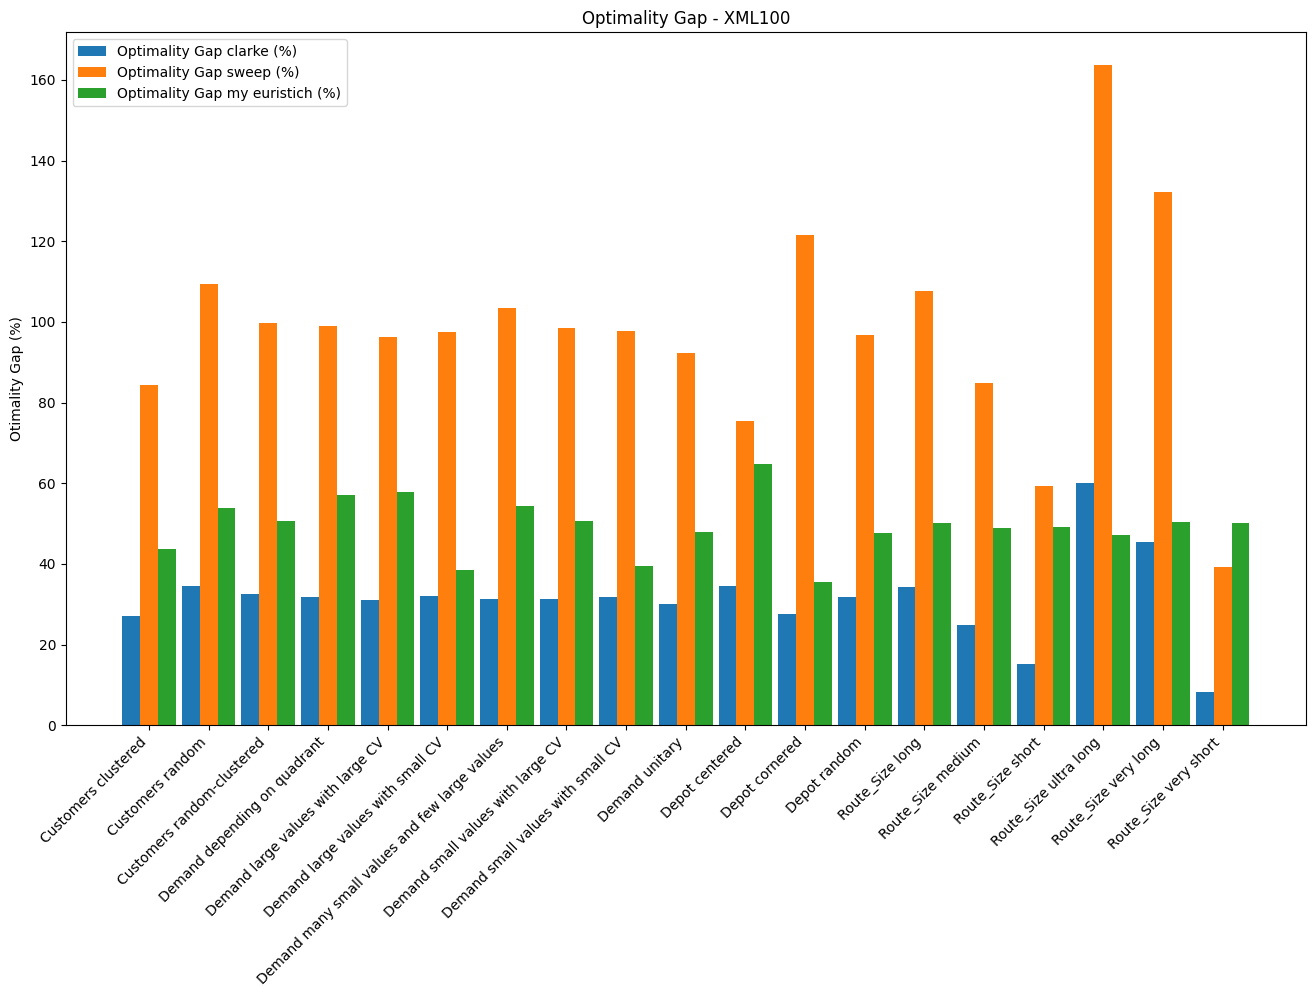

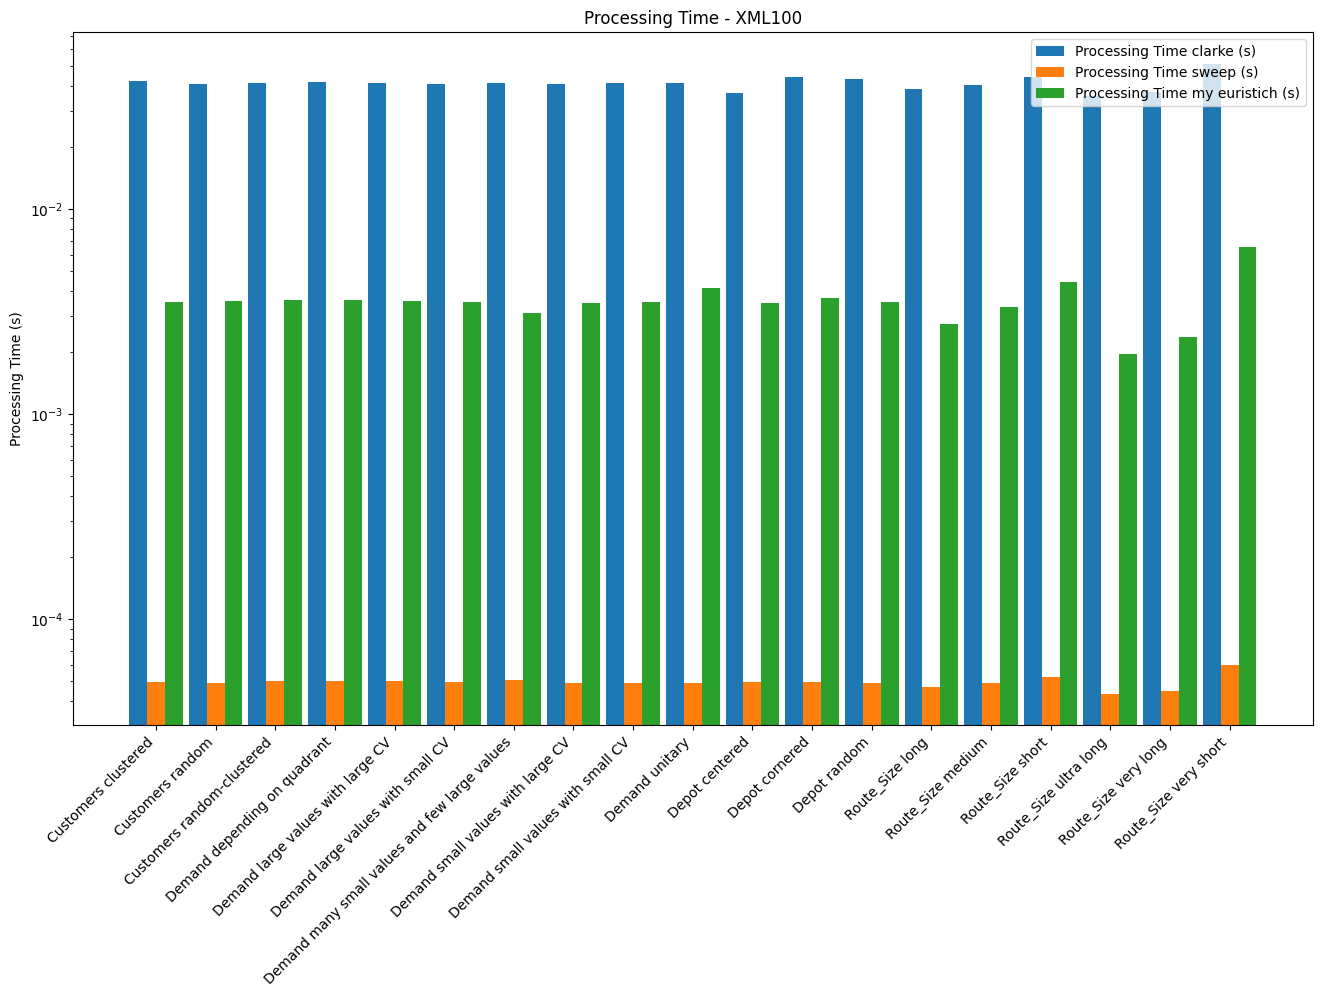

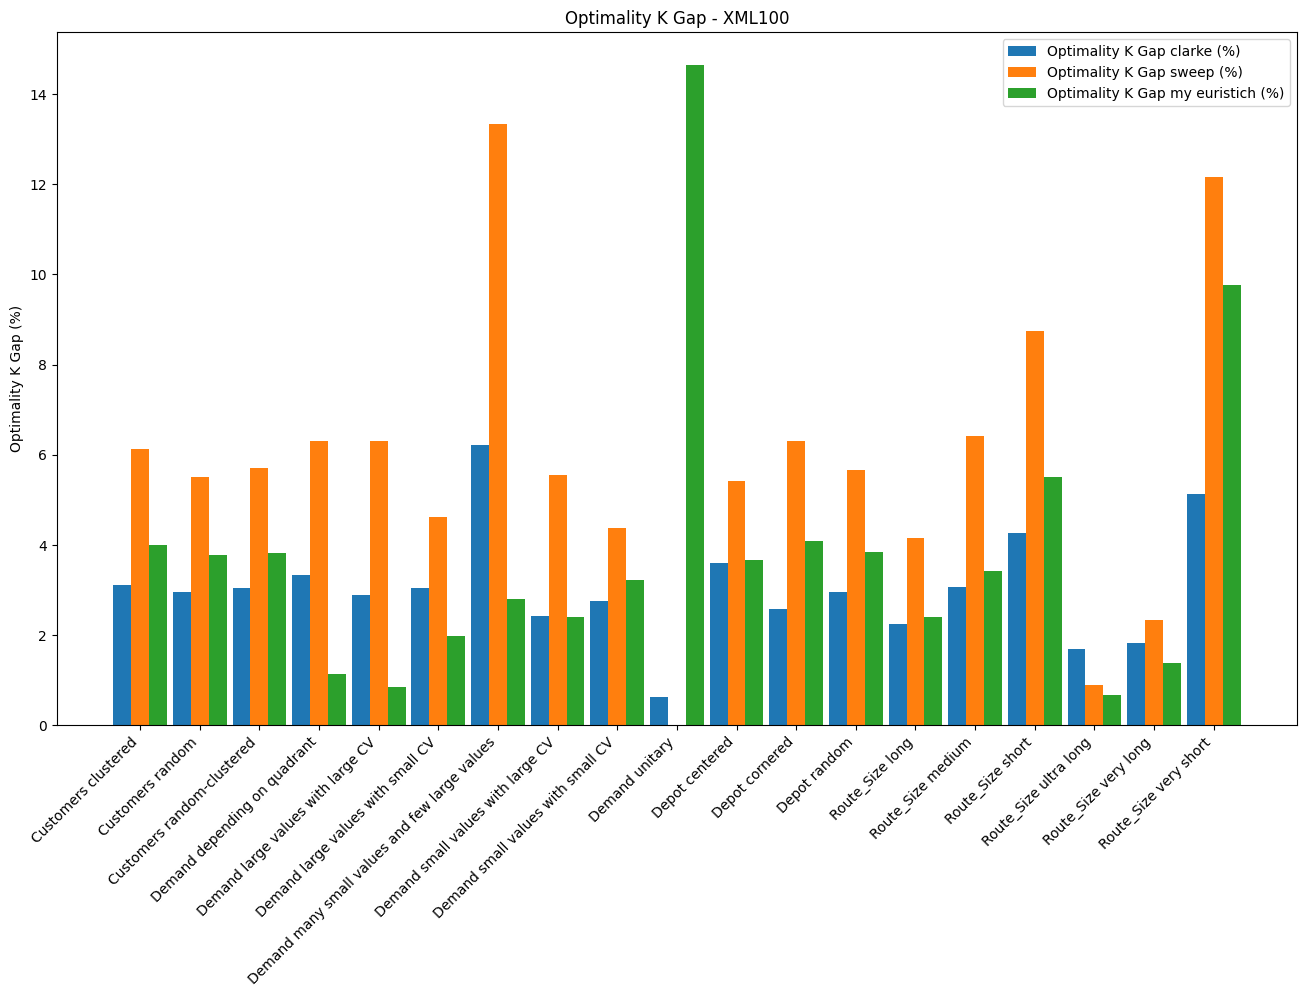

In [8]:
# Grafici su XML100
data_xml_100_aggs = []
for file in ["clarke-results-XML100.csv", "sweep-results-XML100.csv", "my-euristich-results-XML100.csv"]:
    
    data_xml100 = pd.read_csv(dir + file)

    # trasformo ogni numero in una stringa specifica (1: random, 2: centered, 3: cornered)
    data_xml100_depot = data_xml100["Instance"].str[7:8]
    # Customers (1: random, 2: clustered, 3: random-clustered)
    data_xml100_customers = data_xml100["Instance"].str[8:9]
    # Demand (1. unitary, 2. small values with large CV, 3. small values with small CV, 4. large values with large CV, 5. large values with small CV, 6. depending on quadrant, 7. many small values and few large values)
    data_xml100_demand = data_xml100["Instance"].str[9:10]
    # Route size (1: very short, 2: short, 3: medium, 4: long, 5: very long, 6: ultra long)
    data_xml100_route_size = data_xml100["Instance"].str[10:11]
    # aggiungo tutto al dataframe
    data_xml100["Depot"] = data_xml100_depot
    data_xml100["Customers"] = data_xml100_customers
    data_xml100["Demand"] = data_xml100_demand
    data_xml100["Route_Size"] = data_xml100_route_size

    # aggrego i dati per ogni enumerazione di caratteristiche e calcolo la media del gap e del tempo
    data_xml100_agg1 = data_xml100.groupby(["Depot"]).agg({"Optimality_Gap(%)": "mean", "Optimality_K_Gap(%)": "mean", "Processing_Time(s)": "mean"}).reset_index().replace({'1': 'Depot random', '2': 'Depot centered', '3': 'Depot cornered'}).rename(columns={"Depot": "Characteristic"})

    print(data_xml100_agg1)

    data_xml100_agg2 = data_xml100.groupby(["Customers"]).agg({"Optimality_Gap(%)": "mean", "Optimality_K_Gap(%)": "mean", "Processing_Time(s)": "mean"}).reset_index().replace({'1': 'Customers random', '2': 'Customers clustered', '3': 'Customers random-clustered'}).rename(columns={"Customers": "Characteristic"})
    print(data_xml100_agg2)

    data_xml100_agg3 = data_xml100.groupby(["Demand"]).agg({"Optimality_Gap(%)": "mean", "Optimality_K_Gap(%)": "mean", "Processing_Time(s)": "mean"}).reset_index().replace({'1': 'Demand unitary', '2': 'Demand small values with large CV', '3': 'Demand small values with small CV', '4': 'Demand large values with large CV', '5': 'Demand large values with small CV', '6': 'Demand depending on quadrant', '7': 'Demand many small values and few large values'}).rename(columns={"Demand": "Characteristic"})
    print(data_xml100_agg3)

    data_xml100_agg4 = data_xml100.groupby(["Route_Size"]).agg({"Optimality_Gap(%)": "mean", "Optimality_K_Gap(%)": "mean", "Processing_Time(s)": "mean"}).reset_index().replace({'1': 'Route_Size very short', '2': 'Route_Size short', '3': 'Route_Size medium', '4': 'Route_Size long', '5': 'Route_Size very long', '6': 'Route_Size ultra long'}).rename(columns={"Route_Size": "Characteristic"})
    print(data_xml100_agg4)

    # Unisco tutte e 4 sotto un unico dataframe unendo la prima colonna come una sola
    data_xml100_agg = pd.merge(data_xml100_agg1, data_xml100_agg2, how='outer')
    data_xml100_agg = pd.merge(data_xml100_agg, data_xml100_agg3, how='outer')
    data_xml100_agg = pd.merge(data_xml100_agg, data_xml100_agg4, how='outer')
    data_xml_100_aggs.append(data_xml100_agg)
    print(data_xml100_agg)

# Faccio un grafico a barre con i dati aggregati
labels = data_xml_100_aggs[0]["Characteristic"]
gap_values_clarke = data_xml_100_aggs[0]["Optimality_Gap(%)"]
gap_values_sweep = data_xml_100_aggs[1]["Optimality_Gap(%)"]
gap_values_my_euristich = data_xml_100_aggs[2]["Optimality_Gap(%)"]
print("My Euristich Gap Values:", gap_values_my_euristich)
time_values_clarke = data_xml_100_aggs[0]["Processing_Time(s)"]
time_values_sweep = data_xml_100_aggs[1]["Processing_Time(s)"]
time_values_my_euristich = data_xml_100_aggs[2]["Processing_Time(s)"]
k_gap_values_clarke = data_xml_100_aggs[0]["Optimality_K_Gap(%)"]
k_gap_values_sweep = data_xml_100_aggs[1]["Optimality_K_Gap(%)"]
k_gap_values_my_euristich = data_xml_100_aggs[2]["Optimality_K_Gap(%)"]
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 9))
bars1 = ax.bar(x - width, gap_values_clarke, width, label='Optimality Gap clarke (%)')
bars2 = ax.bar(x, gap_values_sweep, width, label='Optimality Gap sweep (%)')
bars3 = ax.bar(x + width, gap_values_my_euristich, width, label='Optimality Gap my euristich (%)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Otimality Gap (%)')
ax.set_title('Optimality Gap - XML100')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

fig, ax = plt.subplots(figsize=(16, 9))
bars2 = ax.bar(x - width, time_values_clarke, width, label='Processing Time clarke (s)')
bars3 = ax.bar(x, time_values_sweep, width, label='Processing Time sweep (s)')
bars4 = ax.bar(x + width, time_values_my_euristich, width, label='Processing Time my euristich (s)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Processing Time (s)')
ax.set_yscale('log')  # scala logaritmica per il tempo
ax.set_title('Processing Time - XML100')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()


fig, ax = plt.subplots(figsize=(16, 9))
bars2 = ax.bar(x - width, k_gap_values_clarke, width, label='Optimality K Gap clarke (%)')
bars3 = ax.bar(x, k_gap_values_sweep, width, label='Optimality K Gap sweep (%)')
bars4 = ax.bar(x + width, k_gap_values_my_euristich, width, label='Optimality K Gap my euristich (%)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Optimality K Gap (%)')
ax.set_title('Optimality K Gap - XML100')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()


/tmp/ipykernel_1319797/601768042.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data["Optimality_Gap(%)"] for data in data_xml100_list], labels=['Clarke-Wright', 'Sweep', 'My Euristich'])


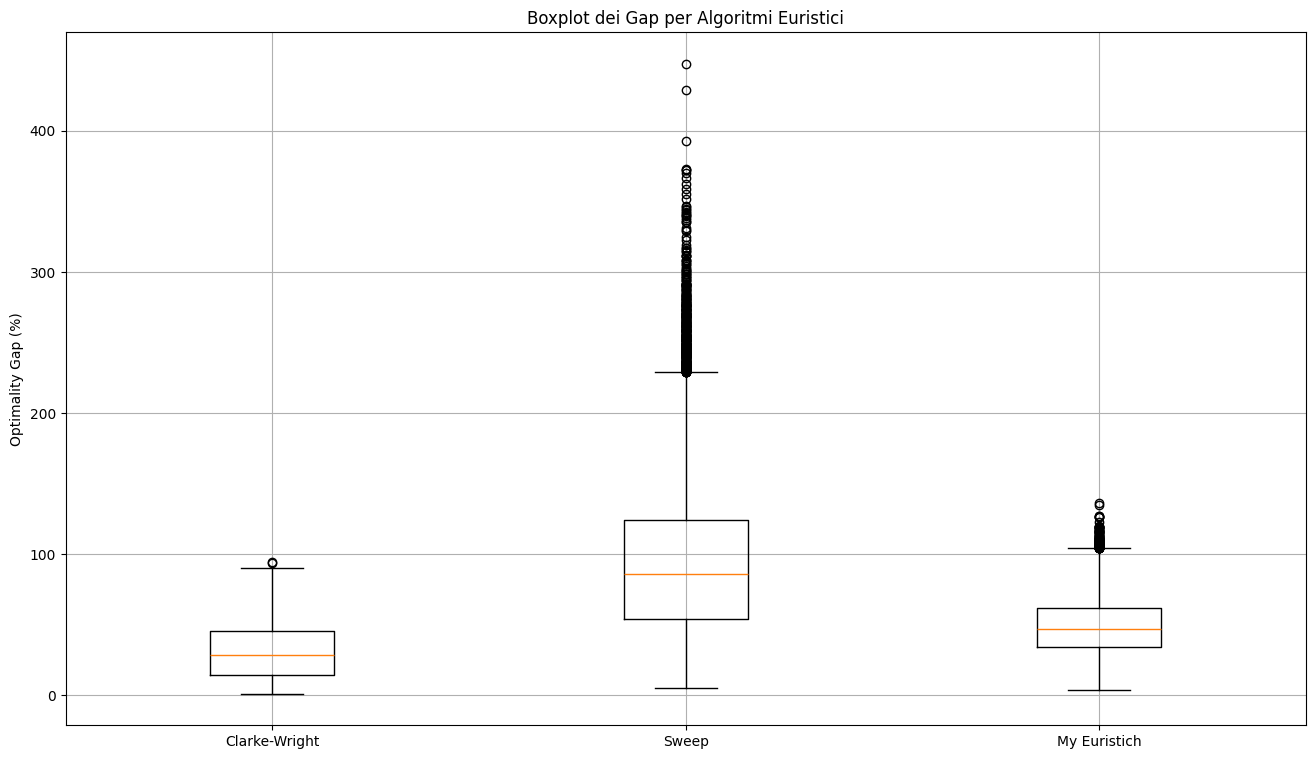

In [11]:
# Faccio il grafico a candela con gli stessi dati
data_xml100_list = []
for file in ["clarke-results-XML100.csv", "sweep-results-XML100.csv", "my-euristich-results-XML100.csv"]:
    data_xml100 = pd.read_csv(dir + file)
    data_xml100.dropna(inplace=True)
    data_xml100_list.append(data_xml100)

plt.figure(figsize=(16, 9))
plt.boxplot([data["Optimality_Gap(%)"] for data in data_xml100_list], labels=['Clarke-Wright', 'Sweep', 'My Euristich'])
plt.ylabel('Optimality Gap (%)')
plt.title('Boxplot dei Gap per Algoritmi Euristici')
plt.grid()
plt.show()